In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stock_returns = pd.read_csv("../../Data/StockReturns.csv")

esg_scores = np.array([
    36.6, 17.9, 18, 
    18, 23.2, 29.2, 
    15.7, 25.4, 25.6, # Del this
    19.8, 13.8, 18.1, 
    17.3, 14, 12.3, 
    21.2, 26.8, 24.9
])

# Defining stock pool
ticker_df =  pd.DataFrame({
    "Petroleum": ["EQNR.OL", "SUBC.OL", "BWO.OL"],
    "Food": ["ORK.OL", "MOWI.OL", "LSG.OL"],
    "Materials": ["NHY.OL", "YAR.OL", "RECSI.OL"],
    "Technologies": ["TEL.OL", "NOD.OL", "ATEA.OL"],
    "Financial": ["STB.OL", "DNB.OL", "AKER.OL"],
    "Shipping":["SNI.OL", "BELCO.OL", "ODF.OL"]
})

stock_cols = stock_returns.columns

train = stock_returns.iloc[:int(len(stock_returns)*0.9)]
valid = stock_returns.iloc[int(len(stock_returns)*0.8):int(len(stock_returns)*0.9)]
test = stock_returns.iloc[int(len(stock_returns)*0.9):]

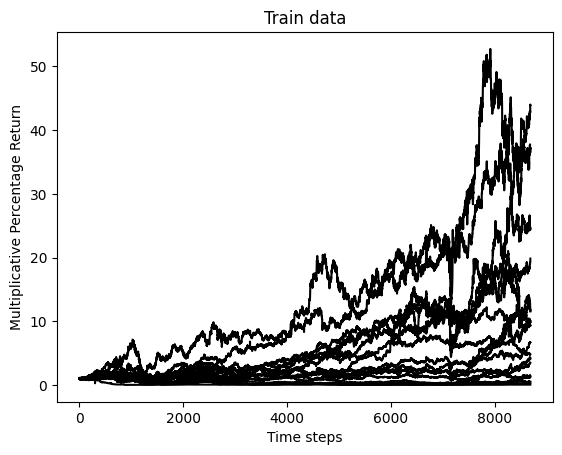

In [4]:
plt.plot(np.cumprod(train+1), color="black", label="Securities")
plt.xlabel("Time steps")
plt.ylabel("Multiplicative Percentage Return")
plt.title("Train data")
plt.show()

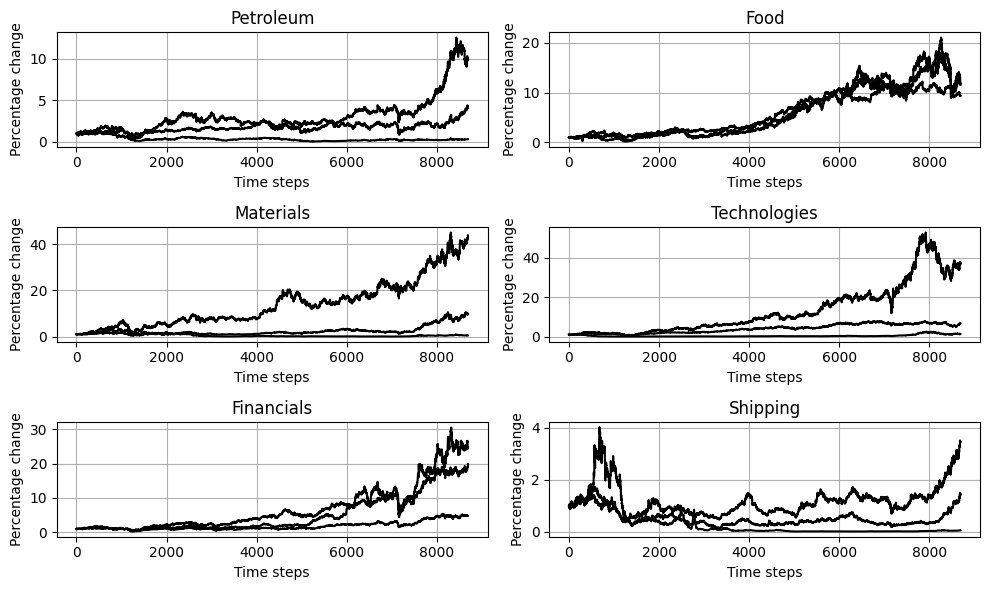

In [5]:
def z_score(arr):
    answer = (arr-arr.mean()) / arr.std()
    return answer

sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(train.iloc[:,(i*6):3+(i*6)]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(train.iloc[:, 3+i*6:(i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


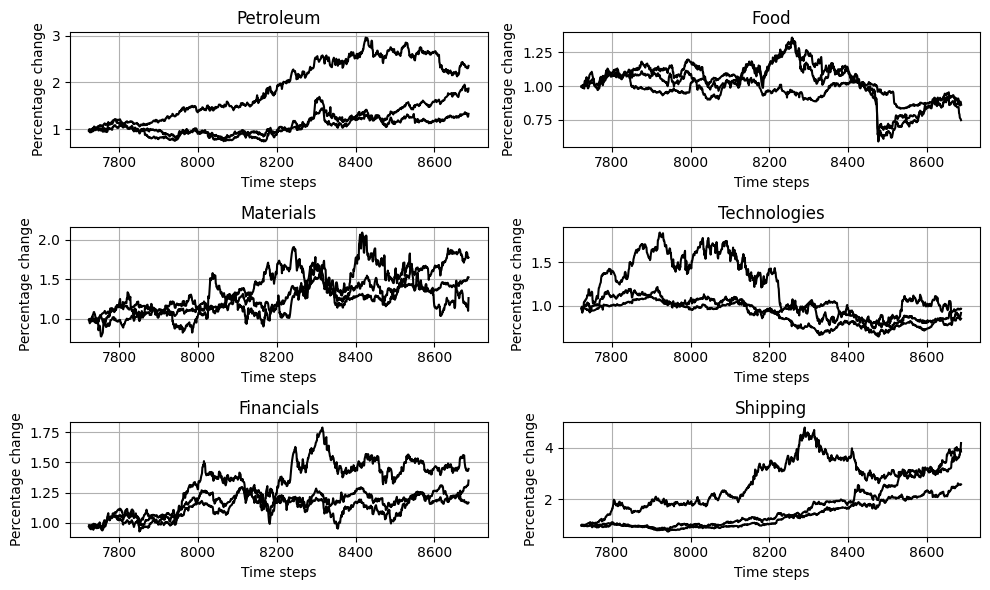

In [6]:
sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(valid.iloc[:,(i*6):3+(i*6)]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(valid.iloc[:, 3+i*6:(i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


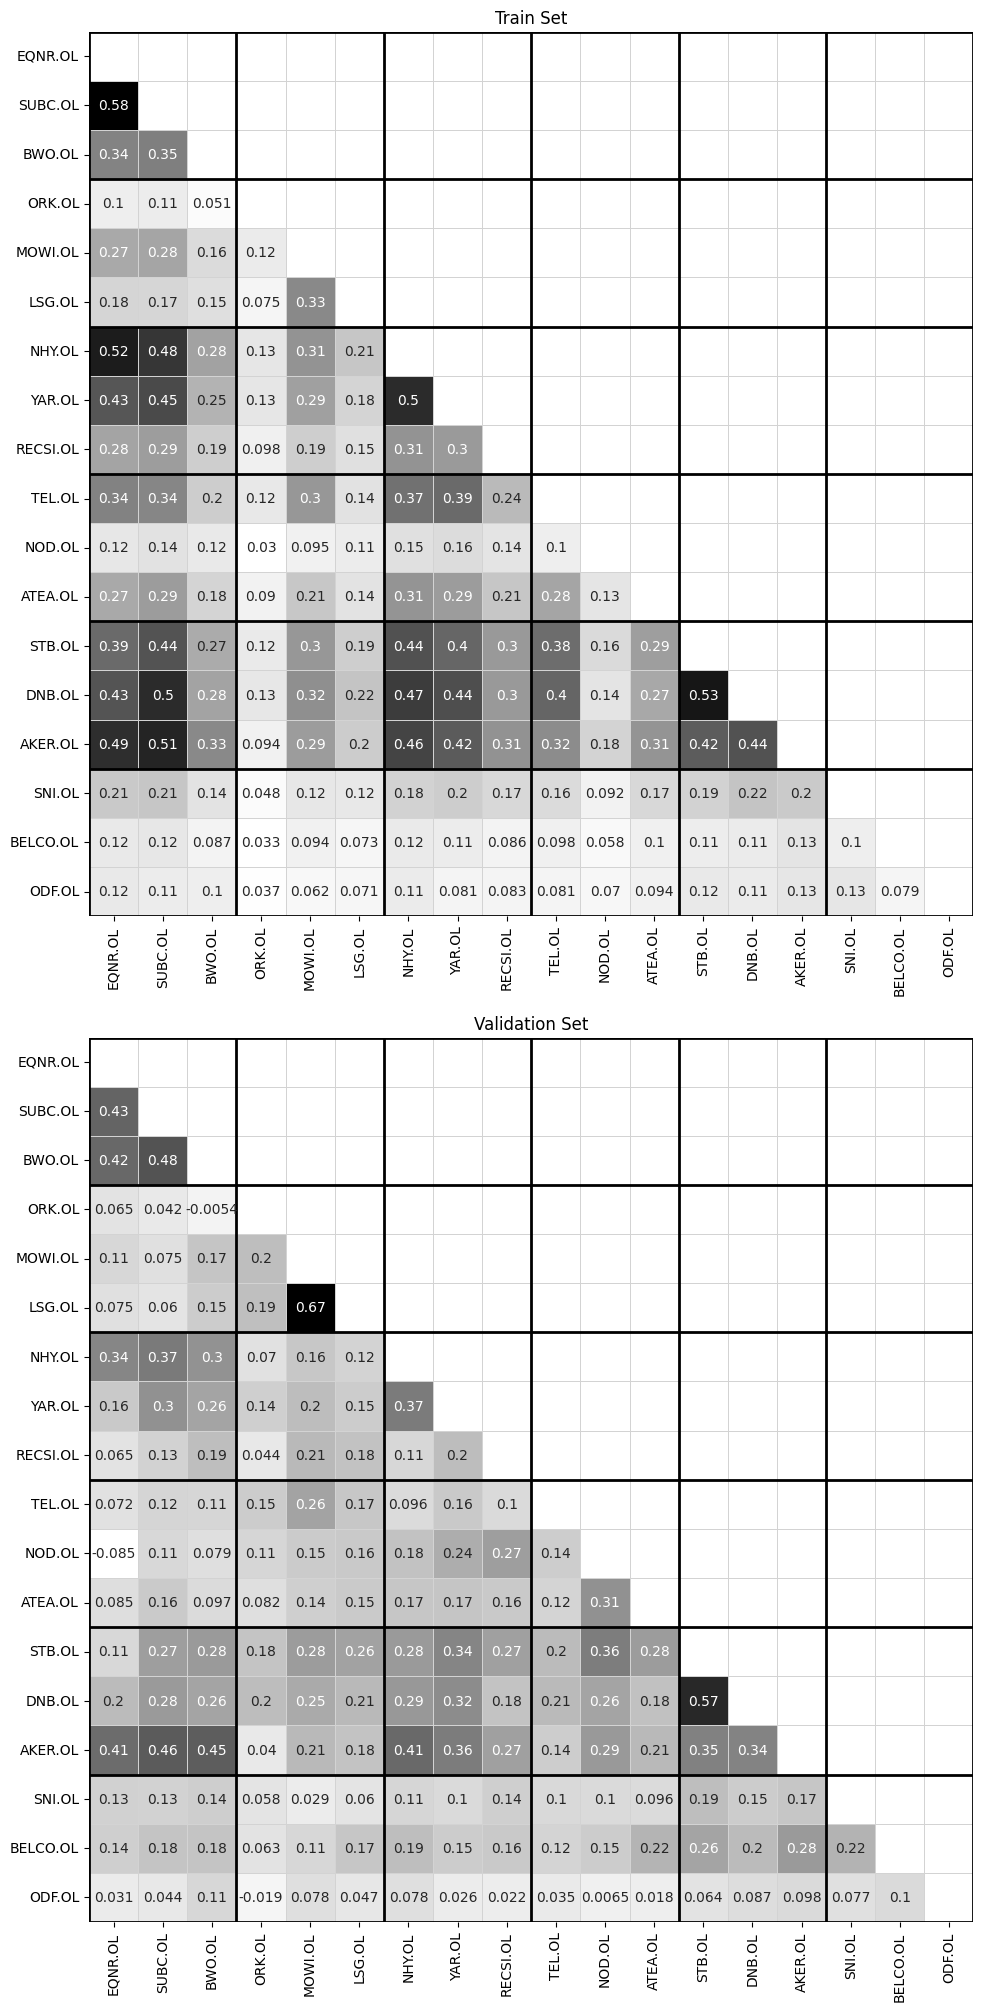

In [23]:
# Create the figure and 3 horizontal subplots
fig, axes = plt.subplots(2,1, figsize=(10, 20), constrained_layout=True)

datasets = [train, valid]
titles = ['Train Set', 'Validation Set']

for i, (ax, data, title) in enumerate(zip(axes, datasets, titles)):
    # Create upper triangle mask
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    
    # Plot heatmap
    sns.heatmap(data.corr(),
                mask=mask,
                annot=True,
                cmap="Greys",
                cbar=(i==2),
                ax=ax,
                square=True,
                linewidths=0.5,
                linecolor='lightgray')

    # Grid lines every 3 rows/cols
    for i in range(0, data.shape[0] + 1,3):
        ax.axhline(i, color='black', linewidth=2)
        ax.axvline(i, color='black', linewidth=2)
    
    ax.set_title(title)

plt.show()


In [8]:
train_valid = pd.concat([train, valid])

In [9]:
np.round(train_valid.iloc[:,:6].describe(),5)

,EQNR.OL,SUBC.OL,BWO.OL,ORK.OL,MOWI.OL,LSG.OL
count,9653.00000,9653.00000,9653.00000,9653.00000,9653.00000,9653.00000
mean,0.00043,0.00042,0.00028,0.00062,0.00040,0.00039
std,0.01403,0.02024,0.02747,0.04307,0.01792,0.01835
min,-0.21426,-0.37711,-0.27536,-0.79811,-0.20635,-0.17992
25%,-0.00633,-0.00815,-0.01176,-0.00400,-0.00589,-0.00736
50%,0.00068,0.00084,0.00000,0.00029,0.00074,0.00004
75%,0.00717,0.00945,0.01180,0.00487,0.00703,0.00815
max,0.08999,0.26625,0.39474,3.97992,0.22000,0.21681


In [10]:
np.round(train_valid.iloc[:,6:12].describe(),5)

,NHY.OL,YAR.OL,RECSI.OL,TEL.OL,NOD.OL,ATEA.OL
count,9653.00000,9653.00000,9653.00000,9653.00000,9653.00000,9653.00000
mean,0.00045,0.00057,0.00056,0.00027,0.00039,0.00050
std,0.01743,0.01622,0.03508,0.01257,0.02724,0.01680
min,-0.14024,-0.22774,-0.24588,-0.19880,-0.26702,-0.16928
25%,-0.00724,-0.00612,-0.01468,-0.00475,-0.01210,-0.00729
50%,0.00095,0.00082,0.00176,0.00037,0.00140,0.00000
75%,0.00860,0.00761,0.01457,0.00524,0.01244,0.00840
max,0.27049,0.16835,0.39568,0.14882,0.37143,0.15349


In [11]:
np.round(train_valid.iloc[:,12:].describe(),5)

,STB.OL,DNB.OL,AKER.OL,SNI.OL,BELCO.OL,ODF.OL
count,9653.00000,9653.00000,9653.00000,9653.00000,9653.00000,9653.00000
mean,0.00036,0.00047,0.00050,0.00041,0.00014,0.00037
std,0.01883,0.01611,0.01606,0.01906,0.02474,0.01967
min,-0.19687,-0.28546,-0.16955,-0.16087,-0.20319,-0.18148
25%,-0.00620,-0.00524,-0.00671,-0.00885,-0.01316,-0.01010
50%,0.00060,0.00066,0.00000,0.00000,0.00000,0.00000
75%,0.00749,0.00646,0.00797,0.00943,0.01229,0.01010
max,0.21176,0.22350,0.13439,0.20863,0.28044,0.17371
